In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import datetime
import warnings
import sys
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
# import dataset
data = pd.read_csv("Dataset/dataset.csv", sep="\t")
data


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
# header check
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# data overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### By above information using 'info()' fucntion we get overview of data attribut, distributions and data types.


##### Points to consider:

1. Column'Income' has missing values, and these will be dropped.
2. Column 'Dt_customer' should be parsed as DateTime using DateTime module.
3. Column's like 'Education' and 'Marital_Status' need to be encoded in numeric.

In [5]:
# data cleaning: remove missing values using pandas' dropna() method.
data = data.dropna()
print("Number of data points in the dataset after removing missing values are:",len(data))

Number of data points in the dataset after removing missing values are: 2216


In [6]:
# data cleaning: format 'Dt_Customer' column into proper date format.
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []

for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print("First entry is on:", min(dates), "and Last entry recorded is on:", max(dates))


First entry is on: 2012-01-08 and Last entry recorded is on: 2014-12-06


In [7]:
# an overview of various categories of Education and Marital_Status
print("----------------------------------------------------")
print("Total  categories in the feature Marital_Status:\n""\n", data["Marital_Status"].value_counts(),"\n")
print("----------------------------------------------------")
print("Total categories in the feature Education:\n""\n", data["Education"].value_counts())

----------------------------------------------------
Total  categories in the feature Marital_Status:

 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

----------------------------------------------------
Total categories in the feature Education:

 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [8]:
# feature engineering: 
# 'Age' column using 'Year_Birth' column

data["Age"] = datetime.datetime.now().year - data['Year_Birth']
print(data["Age"])

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2216, dtype: int64


In [9]:
# feature showing Overall spending as 'Total_Spent' 

data["Total_spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
print(data["Total_spent"])

0       1705
1         28
2        797
3         56
4        449
        ... 
2235    1459
2236     444
2237    1253
2238     873
2239     173
Name: Total_spent, Length: 2216, dtype: int64


In [10]:
# grouping of categories of 'Marital_Status'.

data["Relationship_Status"] = data["Marital_Status"].replace({"Together":"Married", "Alone":"Single", "Divorced":"Single", "Widow":"Single", "Absurd":"Single", "YOLO":"Single",})
data["Relationship_Status"].value_counts()

Married    1430
Single      786
Name: Relationship_Status, dtype: int64

In [11]:
# column containing all childrens by joining 'Kidhome' & 'Teenhome' columns
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

In [12]:
# feature indicating total member in an household

data["Family_Size"] = (data["Relationship_Status"].replace({"Single": 1, "Married": 2})) + (data["Children"])
data["Family_Size"].value_counts()

3    880
2    757
4    296
1    252
5     31
Name: Family_Size, dtype: int64

In [13]:
# feature specifying parenthood

data["Is_Parent"] = np.where(data.Children > 0, 1, 0)
data["Is_Parent"].value_counts()

1    1583
0     633
Name: Is_Parent, dtype: int64

In [14]:
# feature segmenting education levels into three groups

data["Education"] = data["Education"].replace({"Basic": "Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master": "Postgraduate", "PhD":"Postgraduate"})
data["Education"].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

In [15]:
# rename columns for better readability

data = data.rename(columns = {"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"})
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_spent,Relationship_Status,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,67,1705,Single,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,70,28,Single,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,59,797,Married,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,40,56,Married,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,43,449,Married,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,57,1459,Married,1,3,1
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,78,444,Married,3,5,1
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,43,1253,Single,0,1,0
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,68,873,Married,1,3,1


In [16]:
# drop redudant columns

data = data.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis = 1)
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spent,Relationship_Status,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,67,1705,Single,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,70,28,Single,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,59,797,Married,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,40,56,Married,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,43,449,Married,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,57,1459,Married,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,1,0,0,0,78,444,Married,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,43,1253,Single,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,68,873,Married,1,3,1


In [17]:
# quantative overview of the dataset after cleaning and feautring.
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,55.179603,634.104242,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,628.681514,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,73.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,405.000000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1099.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2672.000000,3.000000,5.000000,1.000000


In [18]:
# upon inspecting we can find 'Income' column and 'Age' column has max value which doesn't seems meaningful, therefore we term it as outliers and drop'em.

data = data[(data["Age"]<100)]
data = data[(data["Income"]<600000)]

print("Total number of data points after dropping outliers:", len(data))

Total number of data points after dropping outliers: 2212


In [35]:
# verify for any missing values

data.isna().any()


Education              False
Income                 False
Kidhome                False
Teenhome               False
Recency                False
Wines                  False
Fruits                 False
Meat                   False
Fish                   False
Sweets                 False
Gold                   False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                    False
Total_spent            False
Relationship_Status    False
Children               False
Family_Size            False
Is_Parent              False
dtype: bool

<AxesSubplot:>

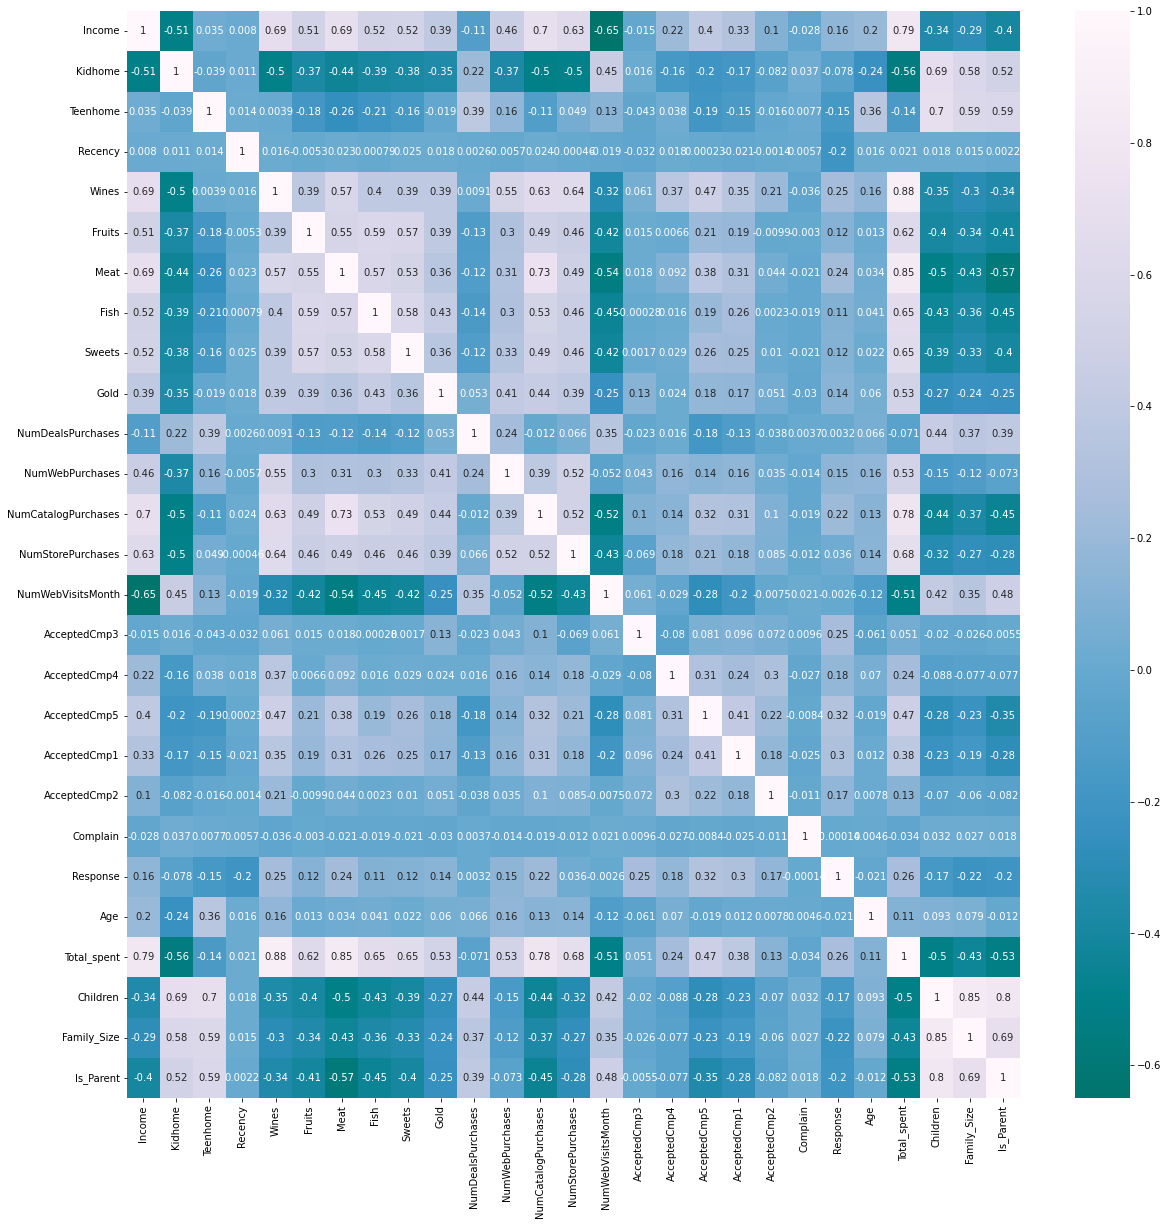

In [19]:
# correlation matrix 

correlationMat = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlationMat, annot = True, cmap = "PuBuGn_r", center = 0) 

# it's visible that the data is free from redundant and missing data.

In [27]:
s = data.dtypes == 'object'
object_cols = list(s[s].index)

print("The Categorial variables in the dataset: ",object_cols)

Categorial variables in the dataset:  ['Education', 'Relationship_Status']


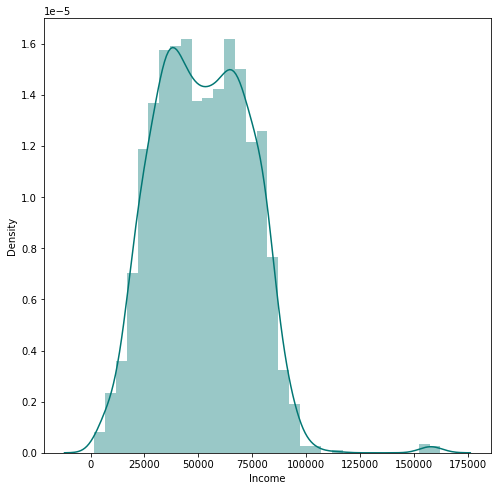

In [47]:
plt.figure(figsize=(8,8))
sns.distplot(data["Income"],color = '#027774')
plt.show()